In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler






In [ ]:
### LOAD DATA  

df = pd.read_csv('/Users/macbook/Desktop/coffee_shop_revenue.csv')
print(df.head())

   Number_of_Customers_Per_Day  Average_Order_Value  Operating_Hours_Per_Day  \
0                          152                 6.74                       14   
1                          485                 4.50                       12   
2                          398                 9.09                        6   
3                          320                 8.48                       17   
4                          156                 7.44                       17   

   Number_of_Employees  Marketing_Spend_Per_Day  Location_Foot_Traffic  \
0                    4                   106.62                     97   
1                    8                    57.83                    744   
2                    6                    91.76                    636   
3                    4                   462.63                    770   
4                    2                   412.52                    232   

   Daily_Revenue  
0        1547.81  
1        2084.68  
2        3118.39 

In [ ]:
### DATA PROCESSING 

#define variables  
X = df.drop(columns=['Daily_Revenue'])  # All independent variables
y = df['Daily_Revenue']  # Target variable

#Standardisation
scaler = StandardScaler()  # Initialize the scaler
X_scaled = scaler.fit_transform(X)  # Fit and transform the dataset

#Split the Data into Training and Testing Sets
#80% goes into training and 20% into testing 
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42 )

# Check shape of train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((1600, 6), (400, 6), (1600,), (400,))

In [ ]:
### TRAINING RIDGE REGRESSION MODEL - for different alpha values 

# Define different alpha values to test
alpha_values = [0.01, 0.1, 1, 10, 100, 1000]

# Store results
ridge_results = {}

for alpha in alpha_values:
    # Train Ridge Regression model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = ridge_model.predict(X_test)
    
    # Compute performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    ridge_results[alpha] = {'MSE': mse, 'R²': r2}

# Convert results to a DataFrame
ridge_df = pd.DataFrame.from_dict(ridge_results, orient='index')
ridge_df.index.name = "Alpha"

# Display Ridge Regression results using Pandas
print(ridge_df)  # Prints the DataFrame in the output


                   MSE        R²
Alpha                           
0.01      97569.587886  0.895577
0.10      97568.375534  0.895578
1.00      97556.562052  0.895591
10.00     97469.047979  0.895685
100.00    99306.298014  0.893718
1000.00  217091.221046  0.767660


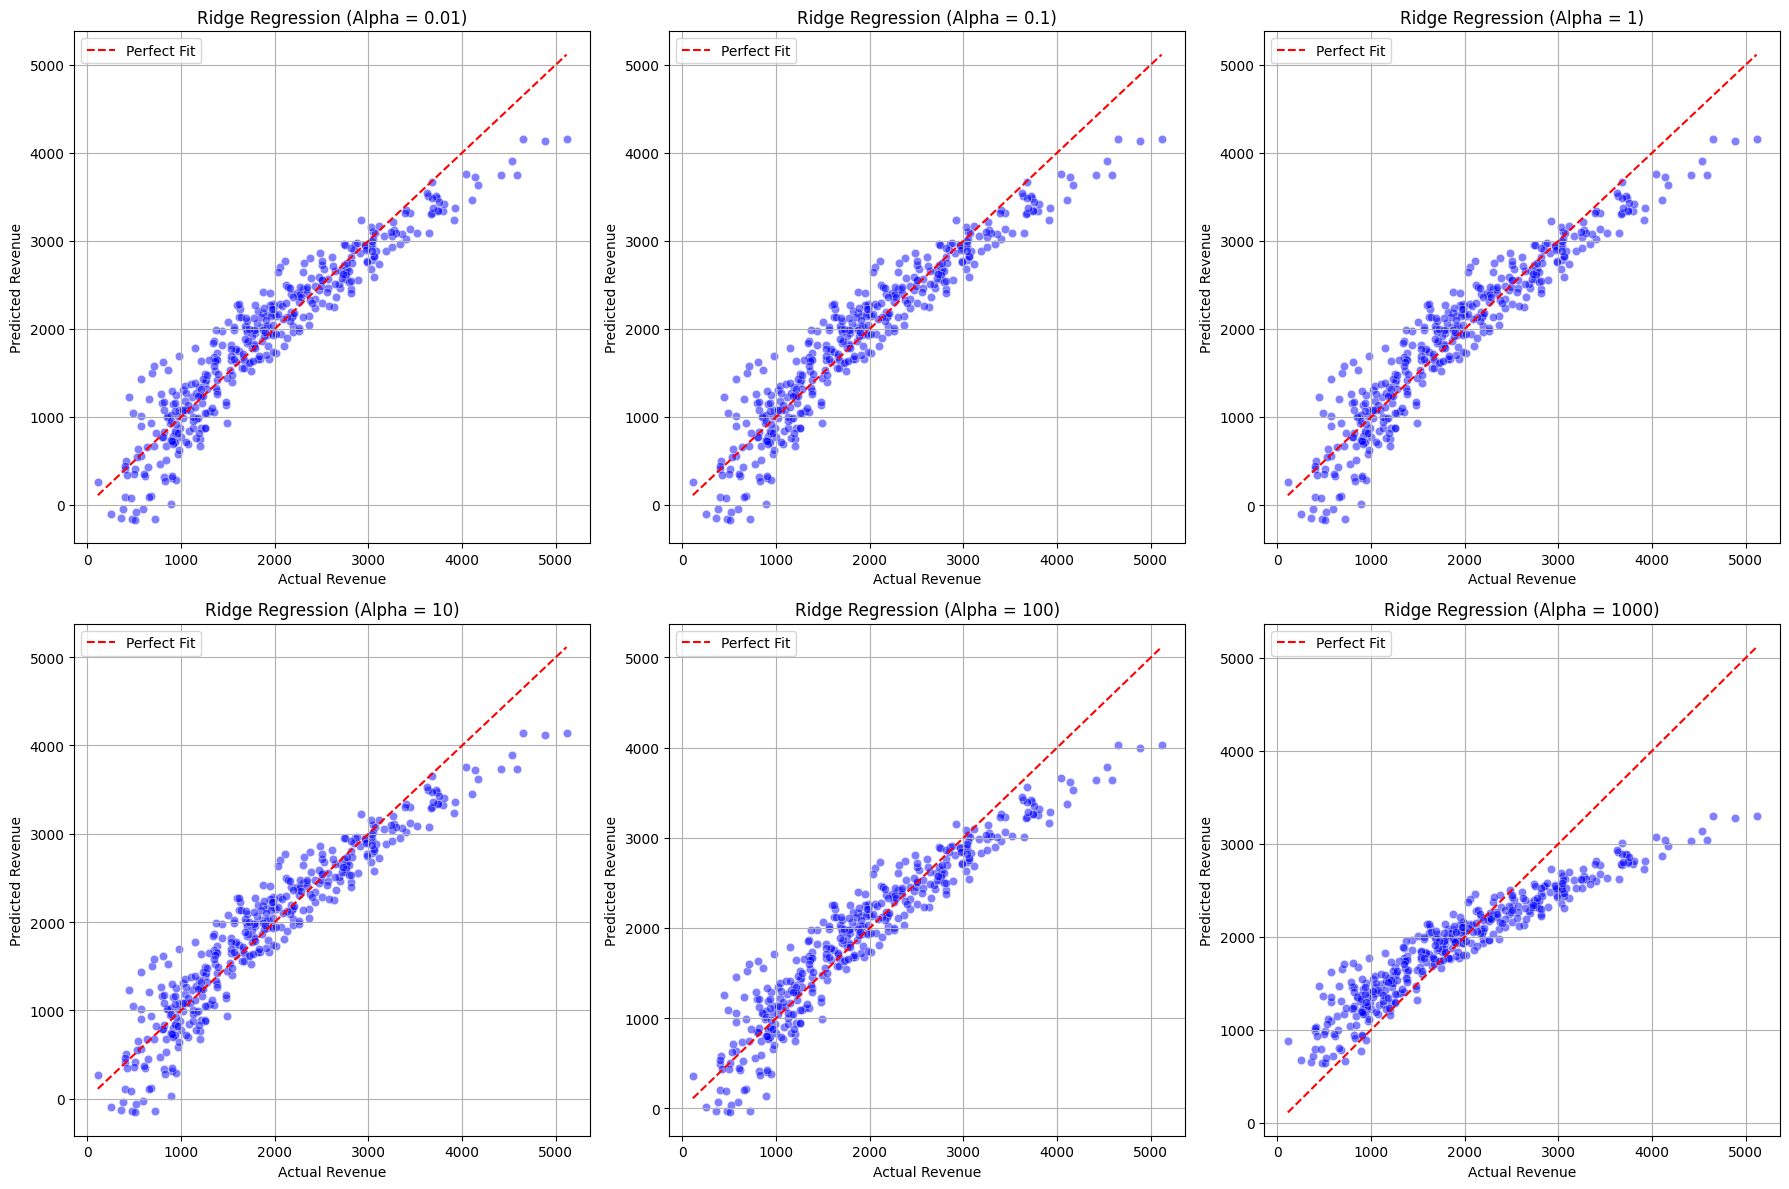

In [40]:

# GRAPHS FOR RIDGE REGRESSION MODELS - generate scatter plots for actual vs. predicted revenue for different alpha values.

# Create subplots
plt.figure(figsize=(18, 12))

for i, alpha in enumerate(alpha_values, 1):  # Start subplot index at 1
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)

    # Create subplot for each alpha
    plt.subplot(2, 3, i)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color="blue")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', label="Perfect Fit")
    plt.xlabel("Actual Revenue")
    plt.ylabel("Predicted Revenue")
    plt.title(f"Ridge Regression (Alpha = {alpha})")
    plt.legend()
    plt.grid()

# Adjust layout and show plot
plt.tight_layout()
plt.show()



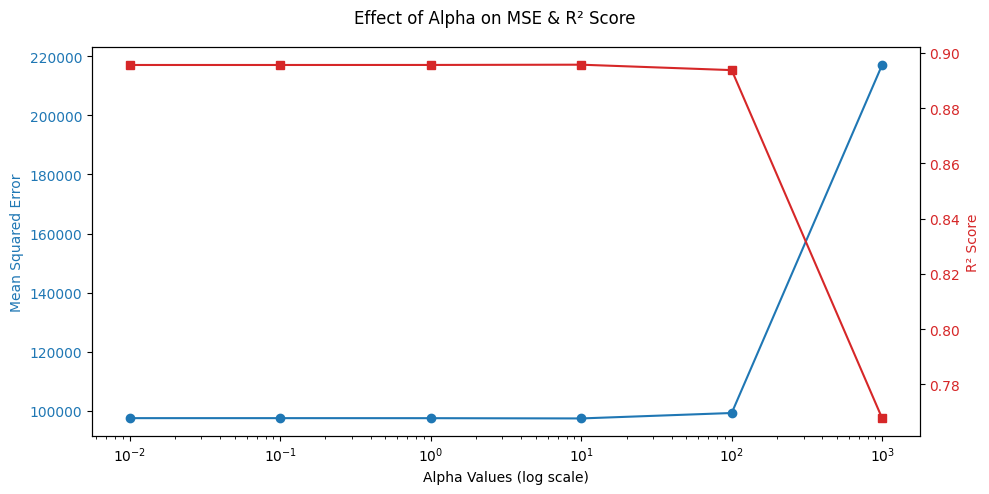

In [36]:
# HOW ALPHA AFFECTS MSE AND R^2

# Extract MSE & R² values
mse_scores = [ridge_results[alpha]['MSE'] for alpha in alpha_values]
r2_scores = [ridge_results[alpha]['R²'] for alpha in alpha_values]

# Plot MSE & R² vs. Alpha values
fig, ax1 = plt.subplots(figsize=(10, 5))

# MSE Plot
ax1.set_xlabel("Alpha Values (log scale)")
ax1.set_xscale("log")
ax1.set_ylabel("Mean Squared Error", color="tab:blue")
ax1.plot(alpha_values, mse_scores, marker='o', linestyle='-', color="tab:blue", label="MSE")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# R² Score Plot
ax2 = ax1.twinx()  # Create secondary y-axis
ax2.set_ylabel("R² Score", color="tab:red")
ax2.plot(alpha_values, r2_scores, marker='s', linestyle='-', color="tab:red", label="R² Score")
ax2.tick_params(axis="y", labelcolor="tab:red")

fig.suptitle("Effect of Alpha on MSE & R² Score")
fig.tight_layout()
plt.show()

